## **Filter Gabor**

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as im
import os 
import pandas as pd
import cv2 as cv
from skimage.color import rgb2gray
import math
import random
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [3]:
folder = [
    "dataset/busuk/",
    "dataset/segar/",
    "dataset/setengah segar/"
]
data = []
labels = []
fileName = []
for i in folder:
    label = i.split('/')[-2].lower().replace(" ", "_")
    dataset = os.listdir(i)
    for file in dataset:
        image_path = os.path.join(i, file)
        nama = os.path.splitext(file)[0]
        temp = cv.imread(image_path)
        if temp is None:
            print(f"Error: Tidak dapat memuat gambar di {image_path}")
            continue
        data.append(temp)
        labels.append(label)
        fileName.append(nama)

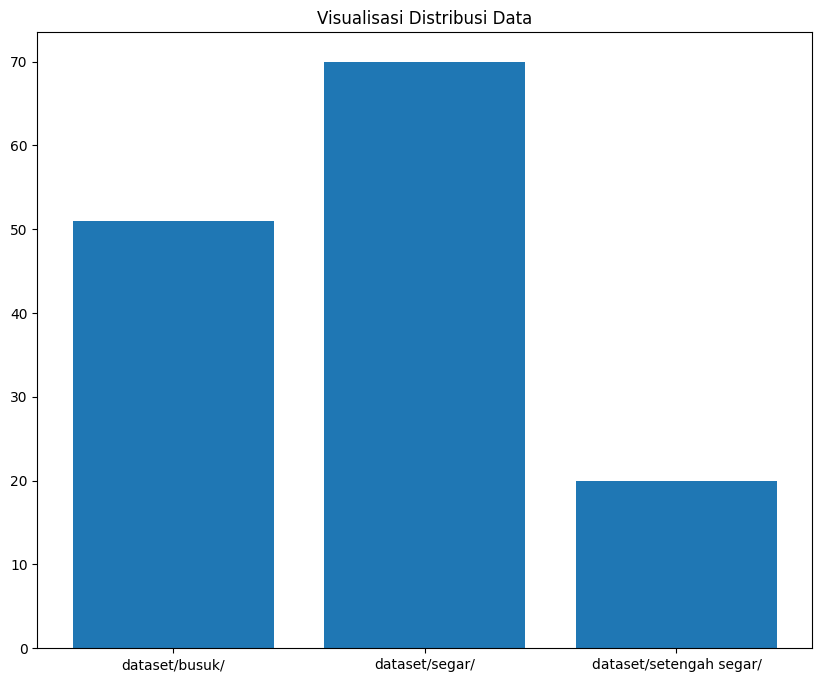

In [4]:
count_data = {}
for i in folder:
    count_data[i] = len(os.listdir(i))

plt.figure(figsize=(10, 8))
plt.bar(count_data.keys(), count_data.values())
plt.title('Visualisasi Distribusi Data')
plt.show()

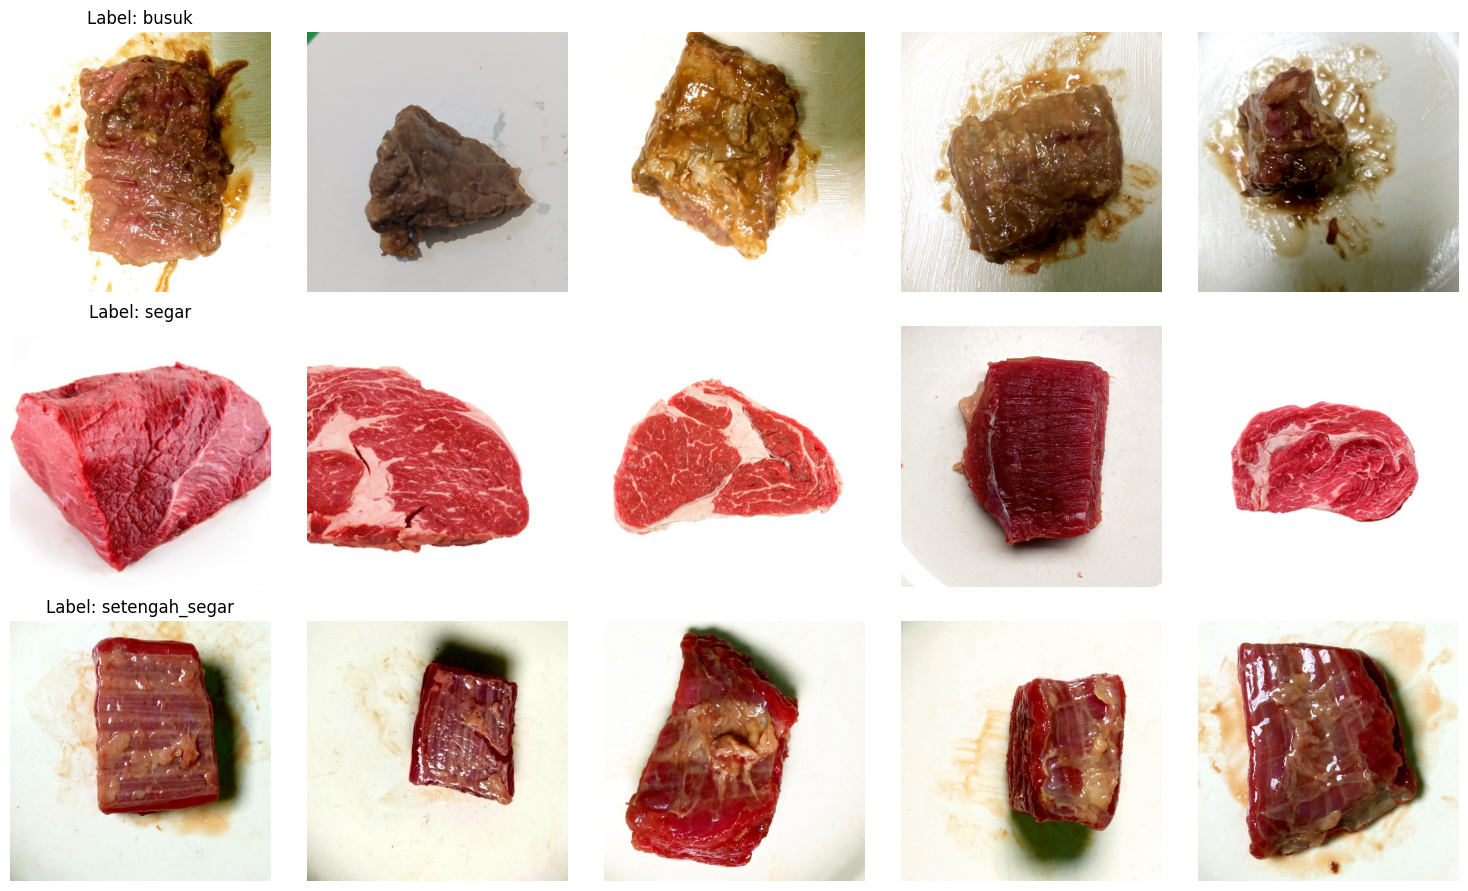

In [5]:
def plot_samples(data, label, num_samples=5):
    unique_labels = np.unique(label)
    fig, axes = plt.subplots(len(unique_labels), num_samples, figsize=(num_samples*3, len(unique_labels)*3))
    for i, j in enumerate(unique_labels):
        indices = [idx for idx, l in enumerate(label) if l == j]
        sample_indices = random.sample(indices, num_samples)
        for k, sample_idx in enumerate(sample_indices):
            if data[sample_idx].ndim == 2: 
                axes[i, k].imshow(data[sample_idx], cmap='gray')
            elif data[sample_idx].shape[2] == 3:
                image = data[sample_idx][:, :, ::-1]
                axes[i, k].imshow(image)
            axes[i, k].axis('off')
            if k == 0:
                axes[i, k].set_title(f'Label: {j}')

    plt.tight_layout()
    plt.show()

plot_samples(data, labels)

In [6]:
data = []
labels = []
fileName = []
for i in folder:
    label = i.split('/')[-2].lower().replace(" ", "_")
    dataset = os.listdir(i)
    for file in dataset:
        image_path = os.path.join(i, file)
        nama = os.path.splitext(file)[0]
        temp = cv.imread(image_path)
        if temp is None:
            print(f"Error: Tidak dapat memuat gambar di {image_path}")
            continue
        grayimage = cv.cvtColor(temp, cv.COLOR_BGR2GRAY)
        data.append(grayimage)
        labels.append(label)
        fileName.append(nama)

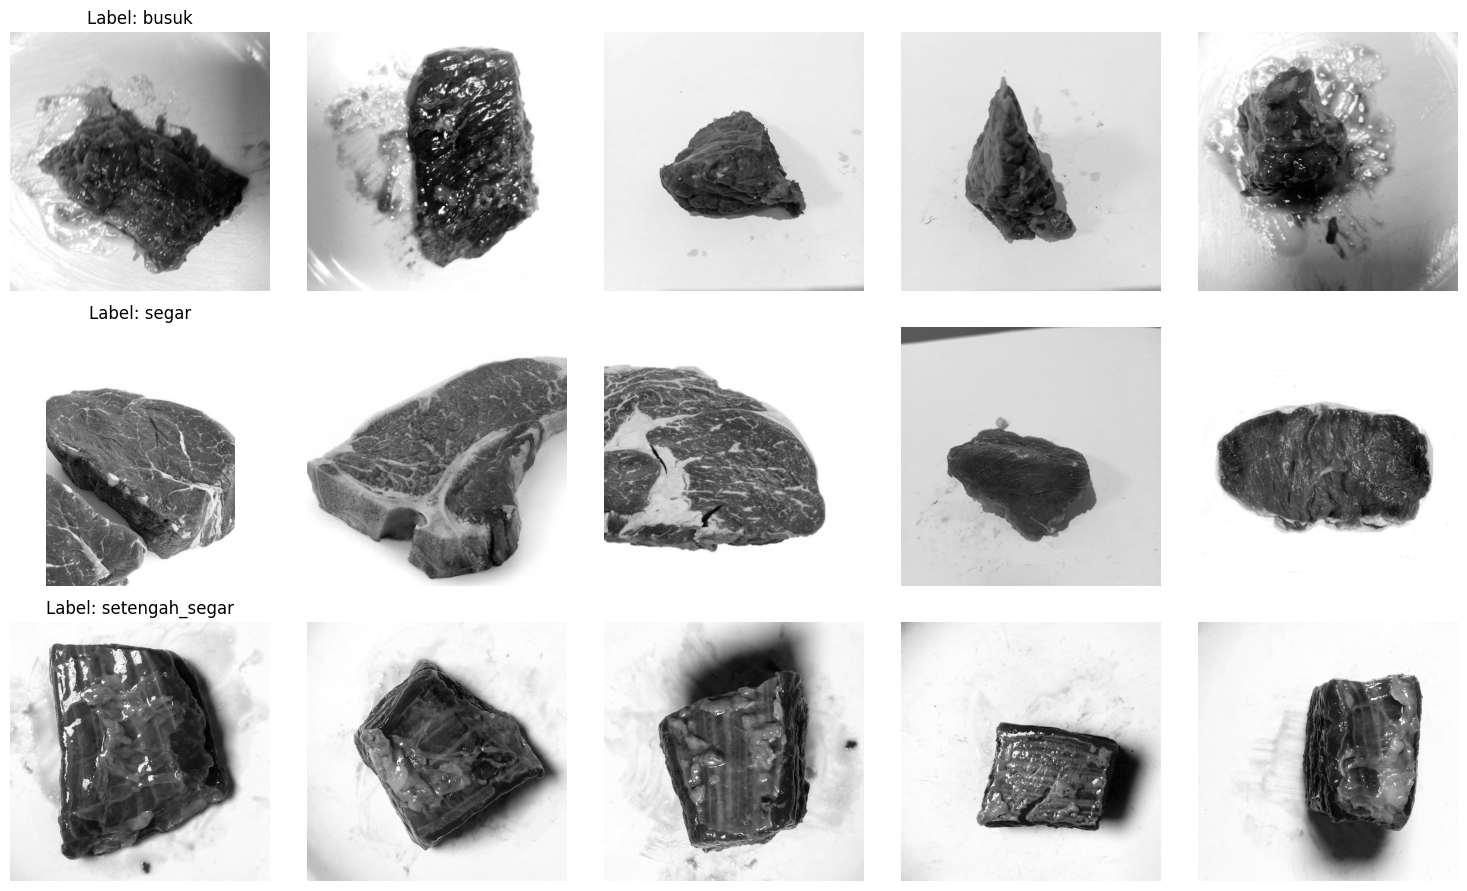

In [7]:
def plot_samples(data, label, num_samples=5):
    unique_labels = np.unique(label)
    fig, axes = plt.subplots(len(unique_labels), num_samples, figsize=(num_samples*3, len(unique_labels)*3))
    for i, j in enumerate(unique_labels):
        indices = [idx for idx, l in enumerate(label) if l == j]
        sample_indices = random.sample(indices, num_samples)
        for k, sample_idx in enumerate(sample_indices):
            if data[sample_idx].ndim == 2: 
                axes[i, k].imshow(data[sample_idx], cmap='gray')
            elif data[sample_idx].shape[2] == 3:
                image = data[sample_idx][:, :, ::-1]
                axes[i, k].imshow(image)
            axes[i, k].axis('off')
            if k == 0:
                axes[i, k].set_title(f'Label: {j}')

    plt.tight_layout()
    plt.show()

plot_samples(data, labels)

In [8]:
def apply_gabor_filter(image):
    gabor_kernels = []
    num_kernels = 16
    for theta in np.arange(0, np.pi, np.pi / num_kernels):
        kernel = cv.getGaborKernel((21, 21), 4.0, theta, 10.0, 0.5, 0, ktype=cv.CV_32F)
        gabor_kernels.append(kernel)
    
    filtered_images = []
    for kernel in gabor_kernels:
        filtered_image = cv.filter2D(image, cv.CV_8UC3, kernel)
        filtered_images.append(filtered_image)
    return filtered_images

Filter Gabor adalah filter yang digunakan dalam pemrosesan citra untuk mengekstrak fitur tekstur. Filter Gabor digunakan dalam preprocessing citra untuk berbagai tujuan, termasuk deteksi tepi, segmentasi objek, ekstraksi tekstur, dan reduksi noise. Mereka memungkinkan representasi citra yang lebih kuat dan robust terhadap variasi pencahayaan dan kontras, sehingga sering diterapkan dalam aplikasi pengolahan citra  seperti pengenalan pola, penglihatan komputer, dan pengolahan medis..

In [9]:
def preprocess(image):
    resized_image = cv.resize(image, (500, 500))
    
    if len(resized_image.shape) == 3 and resized_image.shape[2] == 3:
        gray_image = cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)
    else:
        gray_image = resized_image
    
    gabor_images = apply_gabor_filter(gray_image)
    return gabor_images

Resize dalam konteks preprocessing gambar mengacu pada proses mengubah ukuran dimensi gambar. Ini dilakukan untuk beberapa alasan, termasuk:

1. Konsistensi Ukuran: Memastikan bahwa semua gambar dalam dataset memiliki ukuran yang seragam. Ini berguna saat menggunakan algoritma pembelajaran mesin yang memerlukan input dengan dimensi yang tetap.

2. Pengurangan Komputasi: Mengubah ukuran gambar menjadi ukuran yang lebih kecil dapat mengurangi waktu komputasi dan memori yang dibutuhkan untuk analisis berikutnya, terutama saat memproses volume data yang besar.

3. Persiapan Data: Beberapa algoritma atau teknik pengolahan gambar mungkin memerlukan ukuran gambar tertentu sebagai input. Dengan meresize gambar, kita dapat menyesuaikan data dengan persyaratan ini.

Dalam fungsi preprocess yang telah dijelaskan sebelumnya, proses resize dilakukan untuk menstandarisasi ukuran gambar sebelum penggunaan filter Gabor, sehingga memudahkan proses analisis tekstur lebih lanjut pada citra yang telah diproses.

In [10]:
preprocessed_path = 'dataset/preprocess/'
kategori = ['busuk', 'segar', 'setengah_segar']

if not os.path.exists(preprocessed_path):
    os.makedirs(preprocessed_path)

for i in kategori:
    kategori_path = os.path.join(preprocessed_path, i)
    if not os.path.exists(kategori_path):
        os.makedirs(kategori_path)

In [11]:
preprocessed_data = []
preprocessed_labels = []
for i, image in enumerate(data):
    label = labels[i]
    prepro_images = preprocess(image)
    for prepro_image in prepro_images:
        preprocessed_data.append(prepro_image)
        preprocessed_labels.append(label)

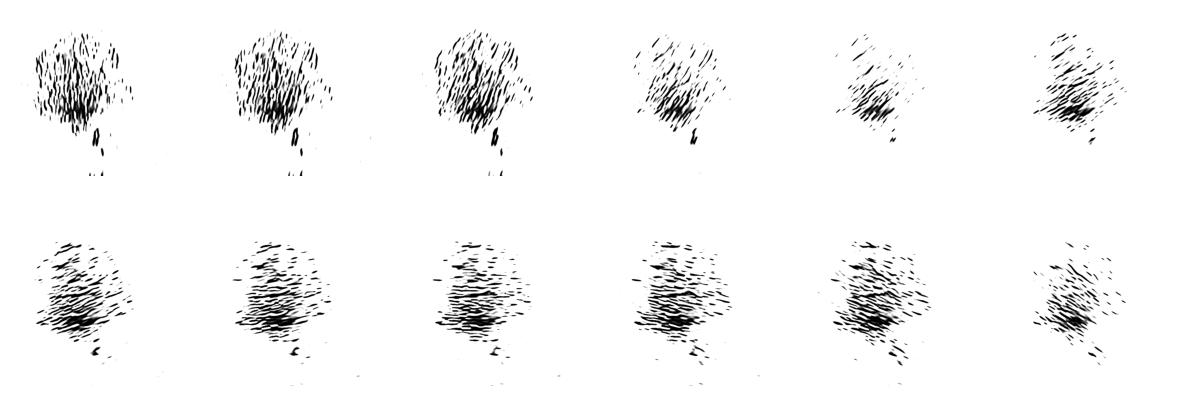

In [12]:
num_samples = min(len(preprocessed_data), 12)

plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(2, 6, i+1)
    plt.imshow(preprocessed_data[i], cmap='gray')
    plt.axis('off')
plt.show()

In [13]:
jenis = {
    'busuk': 0,
    'segar': 1,
    'setengah_segar': 2
}

In [14]:
def extract_glcm_features(images, labels, distances=[5], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True):
    features = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
    angle_labels = ['0', '45', '90', '135']
    df_data = pd.DataFrame()
    for i, image in enumerate(images):
        image = image.astype(int)
        glcm = graycomatrix(image, distances, angles, levels, symmetric, normed)
        for feature in features:
            for angle, angle_label in zip(angles, angle_labels):
                feat_a = graycoprops(glcm, feature)[0, int(angle*4/np.pi)]
                df_data.loc[i, f'{feature}_{angle_label}'] = feat_a
        for angle, angle_label in zip(angles, angle_labels):
            asm = np.sum(glcm[:, :, 0, int(angle*4/np.pi)]**2)
            entropy = -np.sum(glcm[:, :, 0, int(angle*4/np.pi)]*np.log2(glcm[:, :, 0, int(angle*4/np.pi)] + np.finfo(float).eps))
            df_data.loc[i, f'asm_{angle_label}'] = asm
            df_data.loc[i, f'entropy_{angle_label}'] = entropy
        df_data.loc[i, 'label'] = jenis[labels[i]]
    return df_data



In [15]:
folder_baru = [
    "dataset/preprocess/busuk/",
    "dataset/preprocess/segar/",
    "dataset/preprocess/setengah_segar/"
]
data = []
labels = []
fileName = []
for i in folder:
    label = i.split('/')[-2].lower().replace(" ", "_")
    dataset = os.listdir(i)
    for file in dataset:
        image_path = os.path.join(i, file)
        nama = os.path.splitext(file)[0]
        temp = cv.imread(image_path)
        if temp is None:
            print(f"Error: Tidak dapat memuat gambar di {image_path}")
            continue
        grayimage = cv.cvtColor(temp, cv.COLOR_BGR2GRAY)
        data.append(grayimage)
        labels.append(label)
        fileName.append(nama)

In [16]:
# Memanggil fungsi dengan data yang telah dipreproses
df_glcm = extract_glcm_features(preprocessed_data, preprocessed_labels)

# Tampilkan data
df_glcm.head()

,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,...,correlation_135,asm_0,entropy_0,asm_45,entropy_45,asm_90,entropy_90,asm_135,entropy_135,label
0,5401.248937,4791.763698,1360.557115,4806.360164,25.253349,22.813467,8.649956,22.896592,0.848395,0.857209,...,0.335250,0.713036,1.912377,0.722340,1.896878,0.779923,1.662262,0.722285,1.897092,0.0
1,5639.603143,5474.156734,1807.129519,4318.670855,26.232453,25.589681,10.684663,20.990785,0.843941,0.846004,...,0.429767,0.704022,1.947718,0.706028,1.949340,0.765264,1.732355,0.724183,1.903500,0.0
2,5371.194352,5532.267316,2597.534307,3230.186321,25.084630,25.735538,13.875026,16.462685,0.849363,0.846824,...,0.564837,0.711989,1.896424,0.708744,1.908237,0.757355,1.750914,0.745601,1.801870,0.0
3,2854.302869,3157.200361,2178.740048,1247.891137,13.850634,15.120293,11.116331,7.233456,0.910130,0.904854,...,0.695430,0.823676,1.240317,0.816181,1.263942,0.837368,1.200217,0.852924,1.133030,0.0
4,1535.750246,1911.508796,1638.534958,518.067101,7.782990,9.323077,8.191612,3.469181,0.945298,0.939183,...,0.794942,0.889371,0.828964,0.880958,0.855317,0.887718,0.834325,0.909952,0.733419,0.0


In [17]:
df_glcm.to_csv('glcm_features_percobaan2.csv', index=False)
df_glcm = pd.read_csv('glcm_features_percobaan2.csv')

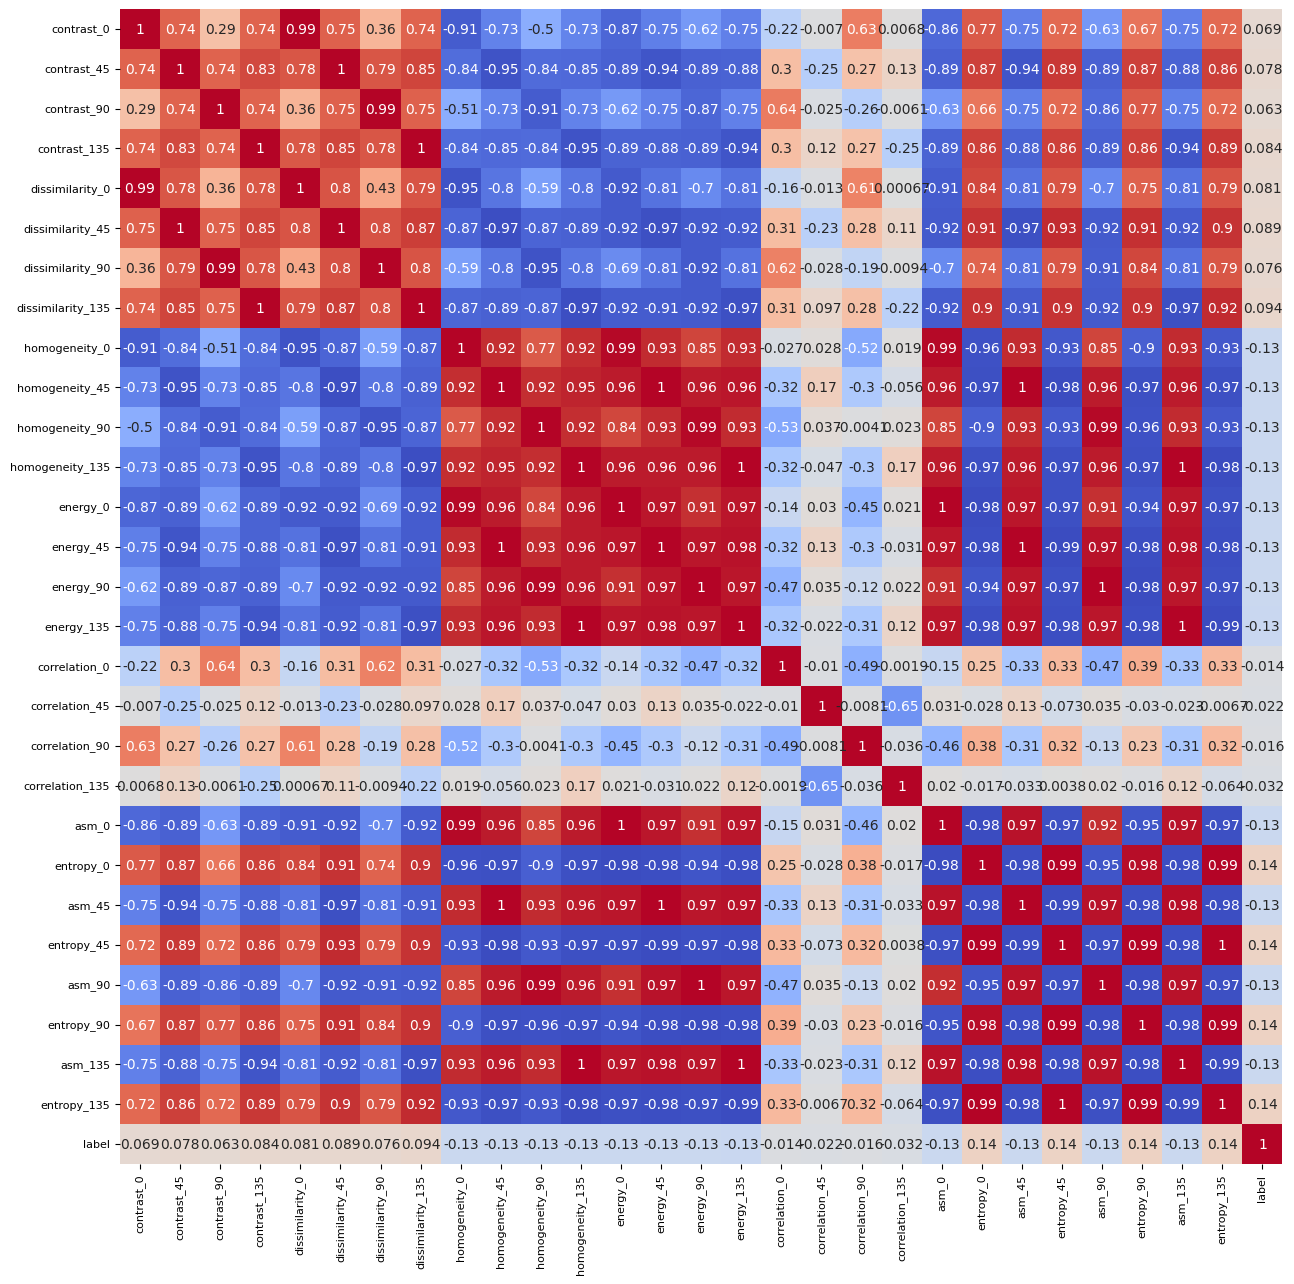

In [18]:
corr_glcm = df_glcm.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_glcm, annot=True, cmap='coolwarm', cbar=False)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

plt.show()

In [19]:
x, y = df_glcm.drop('label', axis=1), df_glcm['label']
pca = PCA(n_components=25)
x_pca = pca.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)


In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
knn = KNeighborsClassifier(n_neighbors=1, metric='cosine')
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.8606194690265486


In [22]:

svm = SVC(kernel='rbf', C=30, gamma='auto')
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.8871681415929203


In [23]:
rfc = RandomForestClassifier(n_estimators=500, class_weight='balanced', n_jobs=-1, max_depth=50, min_samples_leaf=1, min_samples_split=2, bootstrap=False, criterion='gini')
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rfc))

Random Forest Accuracy: 0.8694690265486725


In [24]:
# Evaluate Models
model_dict = {
    'KNN': knn,
    'SVM': svm,
    'RF': rfc
}
df_eval = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=model_dict.keys())


In [25]:
for model_name, model in model_dict.items():
    y_pred = model.predict(x_test)
    df_eval.loc[model_name, 'Accuracy'] = accuracy_score(y_test, y_pred)
    df_eval.loc[model_name, 'Precision'] = precision_score(y_test, y_pred, average='weighted')
    df_eval.loc[model_name, 'Recall'] = recall_score(y_test, y_pred, average='weighted')
    df_eval.loc[model_name, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')

print(df_eval)

     Accuracy Precision    Recall  F1 Score
KNN  0.860619  0.861314  0.860619   0.86083
SVM  0.887168  0.886292  0.887168  0.885819
RF   0.869469  0.868847  0.869469  0.869051


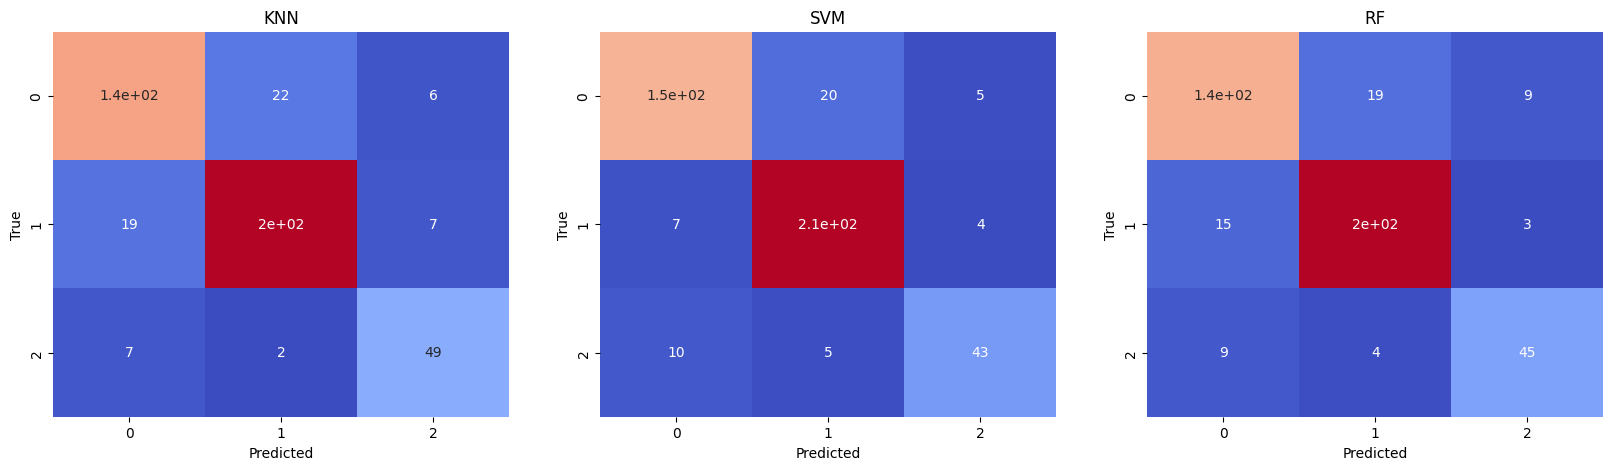

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for i, model_name in enumerate(model_dict.keys()):
    y_pred = model_dict[model_name].predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='coolwarm', cbar=False, ax=ax[i])
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('True')
    ax[i].set_title(model_name)
plt.show()